In [1]:
import numpy as np
from numpy import linalg
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
import math
import pandas as pd
from datetime import datetime
from scipy.spatial import distance
import re
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import ortho_group
m = ortho_group.rvs(dim=3)
from sklearn import ensemble, model_selection, metrics, tree
%matplotlib inline
from sklearn.datasets import load_digits
import time

In [59]:
dataset = "a9a.txt"
data = load_svmlight_file(dataset)
X1, y1 = data[0].toarray(), data[1]
n1, d1 = X1.shape

X2, y2 = data[0].toarray(), data[1]
n2, d2 = X2.shape

X3, y3 = data[0].toarray(), data[1]
n3, d3 = X3.shape

X = np.vstack([X1, X2, X3])
y = np.concatenate([y1, y2, y3])
N, d = X.shape
print(N, d)

mu=0.0
std = 0.05 * np.std(X) # for %5 Gaussian noise
def gaussian_noise(x,mu,std):
    noise = np.random.normal(mu, std, size = x.shape)
    x_noisy = x + noise
    return x_noisy 
X = gaussian_noise(X, mu, std)

L = max(np.linalg.eigvalsh(1/N*X.T.dot(X)))
mu = min(np.linalg.eigvalsh(1/N*X.T.dot(X)))
print("L =", L)
print("mu =", mu)

def All_time(t_loc_, t_comm, b, L, mu, eps, c1, c2):
    t = np.array([])
    for i in range (t_loc_.shape[0]):
        #print(t, t_loc_[i]*b[i])
        t = np.append(t, t_loc_[i]*b[i])
    maxim = max(t)
    #print(maxim)
    K = c1*(L/mu)**0.5*np.log(1/eps)*b[0]**-0.25
    #print(K)
    k_some = c2*(L/mu)**0.5*np.log(1/eps)
    #print(k_some)
    T = K*maxim + K*t_comm + t[0]*k_some
    #print(float(int(K*t_comm)), K, t_comm, float(int(t[0]*k_some)), k_some, t[0])
    return T

97683 123
L = 6.28734872750209
mu = 0.00024355088729259146


In [35]:

epsilon = 4.855708467588126e-09
c1 = 700.0602944751523
c2 = c1 * 1000
print(c1, c2)
alpha = c1*(L/mu)**0.5*np.log(1/epsilon)
beta = c2*(L/mu)**0.5*np.log(1/epsilon)

acceleration = []
degree = []

700.0602944751523 700060.2944751523


### Малые коммуникации

In [40]:
acceleration = []
degree = []
def generate_t_loc1():
    t_loc1 = np.array([10 for i in range(21)])
    t_loc1[0] = 1
    return t_loc1


def generate_b1(t_loc1):
    b1 = np.array([])
    S = (sum(1/t_loc1[i] for i in range(1, t_loc1.shape[0])))**(-1)
    b1 = np.append(b1, max(round(N*S/(t_loc1[0] + S)), 1))
    last = N
    for i in range (1, t_loc1.shape[0]):
        last -=  b1[-1]
        S = (sum(1/t_loc1[k] for k in range(i, t_loc1.shape[0])))**(-1)
        b1 = np.append(b1, round(last/t_loc1[i]*S))
    
    return b1


def generate_b2(t_loc2):
    rand = np.random.uniform(0, N, t_loc2.shape[0])
    rand = np.sort(rand)
    for j in rand:
        j = int(j)
    rand = np.append(rand, N)
    #print(rand)
    b2 = np.array([])
    b2 = np.append(b2, max(round(rand[1] - rand[0]), 1))
    for i in range (1, t_loc2.shape[0]):
        b2 = np.append(b2, round(rand[i+1] - rand[i]))
    return b2

for comm_degree in range(-6, -4):
    print(comm_degree)
    t_comm = 10**(comm_degree)
    #print(t_comm)

    
    t_exp = np.array([])
    for i in range (1000):
        t_loc1 = generate_t_loc1()
        b1 = generate_b1(t_loc1)
        t_exp = np.append(t_exp, round(All_time(t_loc1, t_comm, b1, L, mu, epsilon, c1, c2)))
    t1 = sum(t_exp)/1000
    
    print(t1)
    t_exp = np.array([])
    for i in range (1000):
        t_loc2 = generate_t_loc1()
        b2 = generate_b2(t_loc2)
        #print(t_loc2, t_comm, b2)
        t_exp = np.append(t_exp, round(All_time(t_loc2, t_comm, b2, L, mu, epsilon, c1, c2)))
    t2 = sum(t_exp)/1000
    print(t2)
    acceleration.append(t2/t1)
    print(acceleration)
    degree.append(comm_degree)
    


-6
69840003066928.0
9492980011240.383
[0.13592467918627116]
-5
69840003066928.125
9188058248353.877
[0.13592467918627116, 0.1315586747547663]


In [39]:
print(degree, acceleration)

[-6, -5] [0.1407557073789794, 0.1429109636667835]


In [23]:
print(b2)

[    0.  5834.  3445.  2701.   399.  8397.  7508.  9344.  1172.  2952.
   546.  5219.  4491.  2227.  1501. 13278.  8110.  1760.  7527.  4846.
  3792.]


In [ ]:
acceleration = np.array([1.92261, 1.87979, 1.90127, 1.96660, 1.89239, 2.02698, 1.98657, 2.01242, 2.06895 ])#1e-6 to 1e-2

In [86]:
from scipy import optimize

epsilon = 4.855708467588126e-09
c1 = 700.0602944751523
c2 = c1*1000
alpha = c1*(L/mu)**0.5*np.log(1/epsilon)
beta = c2*(L/mu)**0.5*np.log(1/epsilon)
t_comm = N**(1.8)

sum_t_loc2 = 1/(sum(1/t_loc2[i] for i in range(1, t_loc2.shape[0])))

def f1(x):
    return -0.25*(N*sum_t_loc2 + t_comm)*alpha*x**(-1.25) - 0.75*sum_t_loc2*alpha*x**(-0.25) + beta
def f2(x):
    return -0.25*t_comm*alpha*x**(-1.25) + 0.75*alpha*x**(-0.25) + beta

def func1(x):
    return (N*sum_t_loc2 + t_comm)*alpha*x**(-0.25) - sum_t_loc2*alpha*x**(0.75) + beta * x

def func2(x):
    return alpha*x**(0.75) + t_comm*alpha*x**(-0.25) + beta*x

def find_opt():
    root1 = optimize.newton(f1, 1, tol = 10)
    root2 = optimize.newton(f2, 1, tol = 10)
    if func1(root1) < func2(root2):
        return root1
    else:
        return root2
    

In [84]:
find_opt()


1.800176664001393

In [87]:
acceleration = []

def generate_b_small_opt(t_loc1):
    b1 = np.array([])
    b1 = np.append(b1, max(find_opt(), 1))
    last = N
    for i in range (1, t_loc1.shape[0]):
        last -=  b1[-1]
        S = (sum(1/t_loc1[k] for k in range(i, t_loc1.shape[0])))**(-1)
        b1 = np.append(b1, round(last/t_loc1[i]*S))
    return b1

def generate_b2(t_loc2):
    rand = np.random.uniform(0, N, t_loc2.shape[0])
    rand = np.sort(rand)
    for j in rand:
        j = int(j)
    rand = np.append(rand, N)
    #print(rand)
    b2 = np.array([])
    b2 = np.append(b2, max(1, round(rand[1] - rand[0])))
    for i in range (1, t_loc2.shape[0]):
        b2 = np.append(b2, round(rand[i+1] - rand[i]))
    return b2

def generate_b_big(t_loc1):
    b1 = np.array([])
    b1 = np.append(b1, int(max(1,min(round((t_comm*alpha/(4*beta*t_loc1[0]))**0.8), N))))
    last = N
    for i in range (1, t_loc1.shape[0]):
        last = last - b1[-1]
        b1 = np.append(b1, round(last/(t_loc1.shape[0] - i)))
    return b1

t_loc = generate_t_loc1()
for ijk in range(3,9):
    t_comm = 10**(ijk)
    t_exp_newton = np.array([])
    for i in range (1000):
        b_newton = generate_b_small_opt(t_loc)
        #print(t_exp_newton)
        t_exp_newton = np.append(t_exp_newton, round(All_time(t_loc, t_comm, b_newton, L, mu, epsilon, c1, c2)))
    t_newton = sum(t_exp_newton)/1000
    #print(t_newton)

    t_exp2 = np.array([])
    for i in range (1000):
        b2 = generate_b2(t_loc)
        #print(t_loc2, t_comm, b2)
        t_exp2 = np.append(t_exp2, round(All_time(t_loc, t_comm, b2, L, mu, epsilon, c1, c2)))
    t2 = sum(t_exp2)/1000
    #print(t2)
    acceleration.append(t2/t_newton)
    
print(acceleration)

/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_62294/3465946237.py:21: RuntimeWarning: invalid value encountered in double_scalars
  return alpha*x**(0.75) + t_comm*alpha*x**(-0.25) + beta*x


[88.72067702606664, 79.16921273698124, 34.858106969052876, 5.262899242921528, 0.6509542613328781, 0.223797194517151]


In [105]:
acceleration_small = np.array([1.92261, 1.87979, 1.90127, 1.96660, 1.89239, 2.02698, 1.98657, 2.01242, 2.06895 ])#1e-6 to 1e+2


In [106]:
acceleration_big = np.array([2.275, 1.049, 1.265, 1.931, 2.188 ])

In [116]:
acceleration_wolfram2 = np.array([4.4, 3.1, 4.4, 4.6, 1.8])

In [92]:
def F(x, aa, bb, cc):
    return (2*aa * x**0.5 + (-2)*bb * x**(-0.5) + cc * x)


def All_time2(t_loc, t_comm, b, L, mu, eps, c1, c2):
    t = np.array([])
    for i in range (t_loc.shape[0]):
        t = np.append(t, t_loc[i]*b[i])
    maxim = max(t)
    #print(maxim)
    K = c1*(L/mu)**0.5*np.log(1/eps)*b[0]**-0.5
    #print(K)
    k_some = c2*(L/mu)**0.5*np.log(1/eps)
    #print(k_some)
    T = K*maxim + K*t_comm + t[0]*k_some
    return T

acceleration = []
for ijk in range(-4,12):
    t_comm = 10**(ijk)
    
    b_1_0 = N/21
    #0 < b_1 <= b_1_0
    sum_t_loc2 = 1/(sum(1/t_loc[i] for i in range(1, t_loc.shape[0])))
    b = - 0.5 * alpha * (N * sum_t_loc2 + t_comm)
    a = - 0.5 * alpha * sum_t_loc2
    c = beta * t_loc2[0]
    root = (2*a**6 + 3*math.sqrt(3)*math.sqrt(4*a**3*b**3*c**6 + 27*b**4*c**8)+18*a**3*b*c**2+27*b**2*c**4)**(1/3)
    xxx = a**2 / (3 * c**2) + (root)/(3*2**(1/3)*c**2) - (2**(0.33)*(-a**4-6*a*b*c**2)) / (3*c**2*root)
    batch = list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    #print(b_1_0, xxx)
    if (b_1_0 < xxx ):
        batch[0] = round(b_1_0)
    else:
        batch[0] = round(xxx)
    batch[1] = F(batch[0], a, b, c)
    #print(batch[1], a, b, c)
    # b_1_0 < b_1 <= N 
    a = 0.5 * alpha * t_loc[0]
    b = -0.5 * alpha * t_comm
    c = beta * t_loc2[0]
    if (N >=xxx):
        batch[2] = round(xxx)
    else:
        batch[2] = round(N)
    batch[3] = F(batch[2], a, b, c)
    #print(batch[3])
    if (batch[1] < batch[3]):
        batch[4] = batch[1]
        batch[5] = batch[0]
    else:
        batch[4] = batch[3]
        batch[5] = batch[2]

    print(batch[4], batch[5])


    t_exp = np.array([])
    for i in range (1000):
        b2 = generate_b2(t_loc)
        t_exp = np.append(t_exp, round(All_time2(t_loc, t_comm, b2, L, mu, epsilon, c1, c2)))
    t2 = sum(t_exp)/1000
    #print(t2)
    acceleration.append((t2)/batch[4])
print(acceleration)
    

17231789646.318474 8
17231790331.46647 8
17231797182.946438 8
17231865697.746117 8
17232550845.74293 8
17239402325.711056 8
17307917125.392292 8
20103108897.332775 9
28347988798.399944 10
89518662347.20157 18
407049298218.86487 65
1888848223905.022 293
8767156683241.086 1358
40693335752320.445 6300
188881307564694.44 29240
899266546606790.8 97683
[565.7051216381466, 561.9435437303243, 587.2431897127668, 543.8690815773947, 520.5611659489989, 568.4309546843359, 532.7349684415803, 485.861506124622, 329.22645875365635, 103.28708009842259, 24.424648639406435, 5.326033050750563, 1.7436028029619683, 1.6353487841877723, 3.0380488242143966, 6.215879817779342]


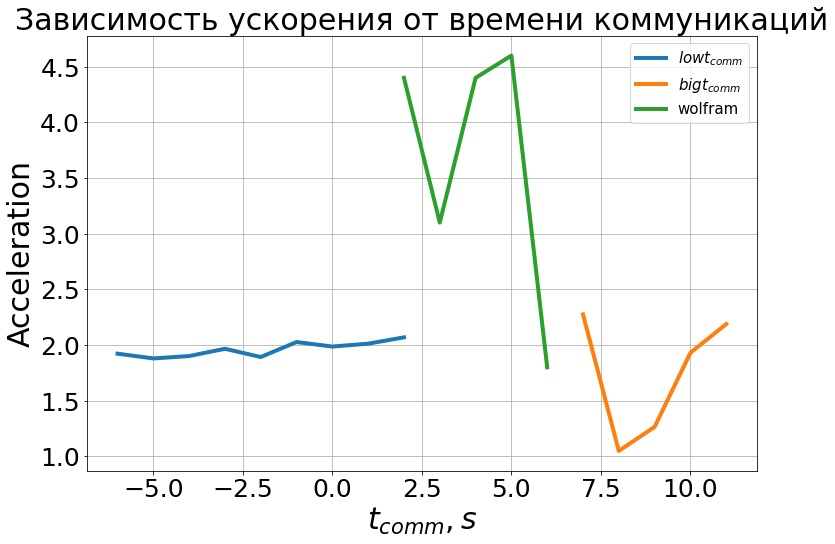

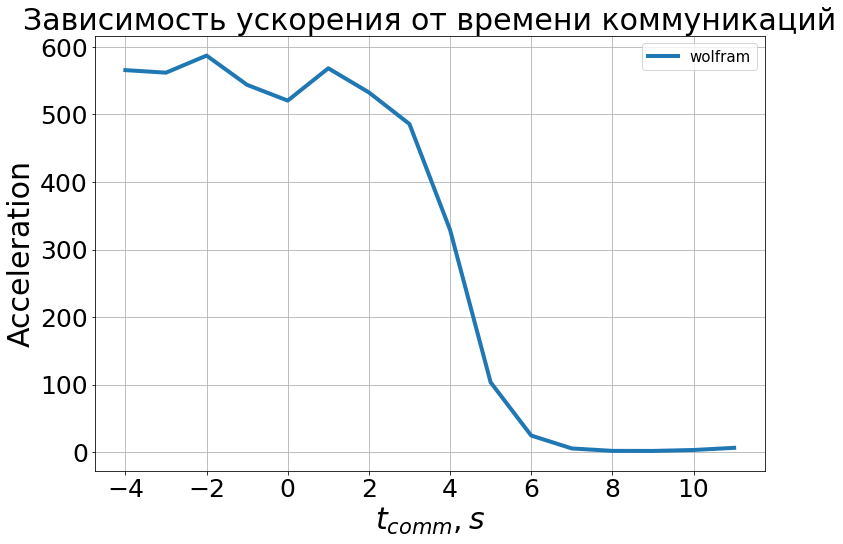

In [119]:
plt.figure(figsize=(12, 8))
X1 = np.arange(-4,12)
X2 = np.arange(-6,3)
X3 = np.arange(7,12)
X4 = np.arange(2,7)
#plt.plot(X1[11:15], acceleration[11:15], linewidth=4, label = 'wolfram')
plt.plot(X2, acceleration_small, linewidth=4, label = r'$low t_{comm}$')
plt.plot(X3, acceleration_big, linewidth=4, label = r'$big t_{comm}$')
plt.plot(X4, acceleration_wolfram2, linewidth=4, label = 'wolfram')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"$t_{comm}, s$", fontsize=30)
plt.ylabel("Acceleration", fontsize=30)
plt.title(r"Зависимость ускорения от времени коммуникаций", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.grid(True)

plt.figure(figsize=(12, 8))
X1 = np.arange(-4,12)
X2 = np.arange(-6,3)
X3 = np.arange(7,12)
plt.plot(X1, acceleration, linewidth=4, label = 'wolfram')
#plt.plot(X2, acceleration_small, linewidth=4, label = r'$low t_{comm}$')
#plt.plot(X3, acceleration_big, linewidth=4, label = r'$big t_{comm}$')

plt.legend(loc="upper right", fontsize=15)
plt.xlabel(r"$t_{comm}, s$", fontsize=30)
plt.ylabel("Acceleration", fontsize=30)
plt.title(r"Зависимость ускорения от времени коммуникаций", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.grid(True)